<a href="https://colab.research.google.com/github/shubh4535/Sentiment-Analysis/blob/main/Sentiment_Analysis_Using_Unsupervised_Lexical_Models_using_Twitter_Dataset_with_Negation_Extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Sentiment Analysis*** also konwn as opinion mining or emotion AI is perhaps one of the most popular applications of natural language processing and text analytics with a vast number of websites, books and tutorials on this subject. Typically sentiment analysis seems to work best on subjective text, where people express opinions, feelings, and their mood. From a real-world industry standpoint, sentiment analysis is widely used to analyze corporate surveys, feedback surveys, social media data, and reviews for movies, places, commodities, and many more. The idea is to analyze and understand the reactions of people toward a specific entity and take insightful actions based on their sentiment.

# Extracting The Dataset


In [ ]:
!pip install kaggle

To set the path for fetching dataset from kaggle using kaggle.json file which is downloaded upon creating new API token in your kaggle account.

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


API Command to fetch Dataset from Kaggle

In [ ]:
!kaggle datasets download -d kazanova/sentiment140

Dataset URL: https://www.kaggle.com/datasets/kazanova/sentiment140
License(s): other
 85% 69.0M/80.9M [00:00<00:00, 160MB/s] 
100% 80.9M/80.9M [00:00<00:00, 150MB/s]


Extracting the content

In [ ]:
from zipfile import ZipFile
twitt_dataset = '/content/sentiment140.zip'

with ZipFile(twitt_dataset, 'r') as zip_ref:
  zip_ref.extractall()
  print('Extracted')

Extracted


In [ ]:
import pandas as pd

In [ ]:
twitter_data = pd.read_csv('/content/training.1600000.processed.noemoticon.csv', encoding='ISO-8859-1')

In [ ]:
twitter_data.shape

(1599999, 6)

Naming the coloumns

In [ ]:
coloumn_names = ['sentiment', 'id', 'date', 'flag', 'user', 'comment']
twitter_data = pd.read_csv('/content/training.1600000.processed.noemoticon.csv', names=coloumn_names, encoding='ISO-8859-1')

In [ ]:
twitter_data.shape

(1600000, 6)

In [ ]:
twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   sentiment  1600000 non-null  int64 
 1   id         1600000 non-null  int64 
 2   date       1600000 non-null  object
 3   flag       1600000 non-null  object
 4   user       1600000 non-null  object
 5   comment    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [ ]:
twitter_data.head()

,sentiment,id,date,flag,user,comment
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


Taking 12.5% of the total dataset to shorten the duration of text preprocessing

In [ ]:
twitt_data = twitter_data[700000:900000]

As you can see there are unnecessary coloumns except the column 'sentiment' and 'text'. So next we remove the unnnecessary coloumns and swaped those necessary cols

In [ ]:
dataset = twitt_data.drop(columns=['id','date','flag','user'])

In [ ]:
def swap_columns(df, col1, col2):
    col_list = list(df.columns)
    x, y = col_list.index(col1), col_list.index(col2)
    col_list[y], col_list[x] = col_list[x], col_list[y]
    df = df[col_list]
    return df
dataset = swap_columns(dataset, 'sentiment', 'comment')

Changed the '0' and '4' values of sentiment column to 'negative' and 'positive' respectively

In [ ]:
dataset.replace({'sentiment': {0: 'negative', 4: 'positive'}}, inplace=True)

In [ ]:
dataset.head()

,comment,sentiment
700000,People are tweeting advice on how to combat te...,negative
700001,"can't go 2 the anberlin show 2nite, tickets so...",negative
700002,Woke up with lots of wisdom teeth drama..Gotta...,negative
700003,@tom_teel Not yet dude... Gonna have to buy a ...,negative
700004,everytime i fall asleep my dreams are haunted,negative


In [ ]:
dataset.tail()

,comment,sentiment
899995,"@jvdouglas haha, no, the remark on maternity ...",positive
899996,@altitis and to you!,positive
899997,Okie doke!! Time for me to escape for the Nort...,positive
899998,"finished the lessons, hooray!",positive
899999,Some ppl are just fucking KP0. Cb ! Stop askin...,positive


In [ ]:
dataset.shape

(200000, 2)

# Text Normalizer






The content below is a dictionary containing the contracted words as key and expanded meanings as values





In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Mon Aug 01 01:11:02 2016

@author: DIP
"""

CONTRACTION_MAP = {
"ain't": "is not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"I'd": "I would",
"I'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "I am",
"I've": "I have",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}

Text preparation and cleaning which includes :-


*   Getting striped text
*   Remove accented charachters
*   Expanding Contractions
*   Removing special charachters
*   Stemming text
*   Lemmatizing text
*   Removing Stopwords
*   Removing extra newlines and white spaces
*   Insert spaces between special characters to isolate them

In [ ]:

# coding: utf-8
"""
Created on Thu Feb 29 12:32:59 2024

@author: SUM
@Copyright: Sumit Nandi
"""

# # Import necessary dependencies

import spacy
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
import re
from bs4 import BeautifulSoup
import unicodedata
from nltk.stem.porter import PorterStemmer
port_stem = PorterStemmer()

nltk.download('stopwords')
nlp = spacy.load('en_core_web_sm')
tokenizer = ToktokTokenizer()
stopword_list = nltk.corpus.stopwords.words('english')
stopword_list.remove('no')
stopword_list.remove('not')


# # Cleaning Text - strip HTML
def strip_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    stripped_text = soup.get_text()
    return stripped_text


# # Removing accented characters
def remove_accented_chars(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text


# # Expanding Contractions
def expand_contractions(text, contraction_mapping=CONTRACTION_MAP):

    contractions_pattern = re.compile('({})'.format('|'.join(contraction_mapping.keys())),
                                      flags=re.IGNORECASE|re.DOTALL)
    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contraction_mapping.get(match) \
                                   if contraction_mapping.get(match) \
                                    else contraction_mapping.get(match.lower())
        expanded_contraction = first_char+expanded_contraction[1:]
        return expanded_contraction

    expanded_text = contractions_pattern.sub(expand_match, text)
    expanded_text = re.sub("'", "", expanded_text)
    return expanded_text


# # Removing Special Characters
def remove_special_characters(text):
    text = re.sub('[^a-zA-Z]', ' ', text)
    return text

# # Stemming text
def stem_text(text):
  text = nlp(text)

  text = [port_stem.stem(word.text) for word in text]
  text = ' '.join(text)

  return text

# # Lemmatizing text
def lemmatize_text(text):
    text = nlp(text)
    text = ' '.join([word.lemma_ if word.lemma_ != '-PRON-' else word.text for word in text])
    return text


# # Removing Stopwords
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text


# # Normalize text corpus - tying it all together
def normalize_corpus(corpus, html_stripping=True, contraction_expansion=True,
                     accented_char_removal=True, text_lower_case=True, special_char_removal=True,
                     stopword_removal=True, text_stemming=True,
                     text_lemmatization=True):

    normalized_corpus = []

    for doc in corpus:

        if html_stripping:
            doc = strip_html_tags(doc)

        if accented_char_removal:
            doc = remove_accented_chars(doc)

        if contraction_expansion:
            doc = expand_contractions(doc)

        if text_lower_case:
            doc = doc.lower()

        # remove extra newlines
        doc = re.sub(r'[\r|\n|\r\n]+', ' ',doc)
        # insert spaces between special characters to isolate them
        special_char_pattern = re.compile(r'([{.(-)!}])')
        doc = special_char_pattern.sub(" \\1 ", doc)



        if special_char_removal:
            doc = remove_special_characters(doc)

        # remove extra whitespace
        doc = re.sub(' +', ' ', doc)

        if stopword_removal:
            doc = remove_stopwords(doc, is_lower_case=text_lower_case)

        if text_stemming:
            doc = stem_text(doc)

        if text_lemmatization:
            doc = lemmatize_text(doc)

        normalized_corpus.append(doc)

    return normalized_corpus

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# Lexical Models


**Lexicon-based** Sentiment Analysis techniques, as opposed to the Machine Learning techniques, are based on calculation of polarity scores given to positive and negative words in a document.

**Sentiment polarity** is typically a numeric score that’s assigned to both the positive and negative aspects of a text document based on subjective parameters like specific words and phrases expressing feelings and emotion. Neutral sentiment typically has 0 polarity since it does not express and specific sentiment, positive sentiment will have polarity > 0, and negative < 0. Of course, you can always change these thresholds based on the type of text you are dealing with; there are no hard constraints on this.

Unsupervised sentiment analysis models make use of well curated knowledgebases, ontologies, lexicons and databases which have detailed information pertaining to subjective words, phrases including sentiment, mood, polarity, objectivity, subjectivity and so on. A lexicon model typically uses a lexicon, also known as a dictionary or vocabulary of words specifically aligned towards sentiment analysis. Usually these lexicons contain a list of words associated with positive and negative sentiment, polarity (magnitude of negative or positive score), parts of speech (POS) tags, subjectivity classifiers (strong, weak, neutral), mood, modality and so on.

In this file the lexical models are built

In [ ]:

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')
nltk.download('sentiwordnet')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package sentiwordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/sentiwordnet.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
import numpy as np
import nltk
import textblob
import importlib.util
from sklearn.metrics import confusion_matrix, classification_report
np.set_printoptions(precision=2, linewidth=80)


***Extracting*** data for model evaluation

taking 80% as testing data

In [ ]:
comments = np.array(dataset['comment'])
sentiments = np.array(dataset['sentiment'])
test_comments = comments[20000:180000]
test_sentiments = sentiments[20000:180000]
sample_comment_ids = [2, 555, 17626, 153533, 120043, 79859, 119010, 159997]

In [ ]:
print(len(test_comments))

160000


In [ ]:
sample_comments_df = dataset[dataset['comment'].isin(sample_comment_ids)]

# Display contents of filtered rows
print(sample_comments_df)

Empty DataFrame
Columns: [comment, sentiment]
Index: []


In [ ]:
for comment_id in sample_comment_ids:
    if comment_id in dataset.index:
        print(f"Comment ID {comment_id} is present in the dataset.")
    else:
        print(f"Comment ID {comment_id} is not present in the dataset.")

Comment ID 2 is not present in the dataset.
Comment ID 555 is not present in the dataset.
Comment ID 17626 is not present in the dataset.
Comment ID 153533 is not present in the dataset.
Comment ID 120043 is not present in the dataset.
Comment ID 79859 is not present in the dataset.
Comment ID 119010 is not present in the dataset.
Comment ID 159997 is not present in the dataset.


Normalizing dataset

In [ ]:
test_comments_df = normalize_corpus(test_comments)

<ipython-input-20-ff5df166b218>:30: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


In [ ]:
test_comments = np.array(test_comments_df)

In [ ]:
print(len(test_comments))

160000


In [ ]:
print(test_comments[:10])

['I m sooo tire have not realli do anyth day I m also sad booki go work need cuddl time'
 'sweetleafceo pm suck sorri'
 'mocashop wow normal ferrel fan make sad wait dvd not wast thx head'
 'kinda peev miss good food'
 'dam cardin take first place game win vs royal brewer loss'
 'take break play halo brother twiiter scienc hw' 'do not know leave eye hurt'
 'laurenconrad ohh want go see' 'might strep' 'last night chi']


# Sentiment Analysis with TextBlob

TextBlob is a python library and offers a simple API to access its methods and perform basic NLP tasks. A good thing about TextBlob is that they are just like python strings.

The sentiment function of textblob returns two properties, polarity, and subjectivity.

Polarity is float which lies in the range of [-1,1] where 1 means positive statement and -1 means a negative statement. Subjective sentences generally refer to personal opinion, emotion or judgment whereas objective refers to factual information. Subjectivity is also a float which lies in the range of [0,1].

In [ ]:
type(zip)

type

In [ ]:
for i in sample_comment_ids:
    comment = test_comments[i]
    sentiment = test_sentiments[i]

    print('COMMENT:', comment)
    print('Actual Sentiment:', sentiment)
    print('Predicted Sentiment polarity:', textblob.TextBlob(comment).sentiment.polarity)
    print('-'*60)

COMMENT: mocashop wow normal ferrel fan make sad wait dvd not wast thx head
Actual Sentiment: negative
Predicted Sentiment polarity: -0.08333333333333333
------------------------------------------------------------
COMMENT: would someon care explain konran wallenrod wikipedia suck
Actual Sentiment: negative
Predicted Sentiment polarity: 0.0
------------------------------------------------------------
COMMENT: bed tag do night tomorrow work entir websit hope look well not like
Actual Sentiment: negative
Predicted Sentiment polarity: 0.0
------------------------------------------------------------
COMMENT: dy say everi sunset thr sunris delhi day extrem heat temp reach thr rain
Actual Sentiment: positive
Predicted Sentiment polarity: 0.0
------------------------------------------------------------
COMMENT: get do die hairrrr home chillin wit si
Actual Sentiment: positive
Predicted Sentiment polarity: 0.0
------------------------------------------------------------
COMMENT: lose billa soo

Predicted the sentiment for test dataset

In [ ]:
sentiment_polarity = [textblob.TextBlob(text).sentiment.polarity for text in test_comments]

declared the sentiments as positive and negative

In [ ]:
predicted_sentiments = ['positive' if score >= 0.1 else 'negative' for score in sentiment_polarity]

classification report and confusion matrix

In [ ]:
labels = ['negative', 'positive']
print(classification_report(test_sentiments, predicted_sentiments))
pd.DataFrame(confusion_matrix(test_sentiments, predicted_sentiments), index=labels, columns=labels)

              precision    recall  f1-score   support

    negative       0.57      0.77      0.66     80000
    positive       0.65      0.43      0.52     80000

    accuracy                           0.60    160000
   macro avg       0.61      0.60      0.59    160000
weighted avg       0.61      0.60      0.59    160000



,negative,positive
negative,61866,18134
positive,45812,34188


Sample comment IDs report

In [ ]:
Text = test_comments[sample_comment_ids]
Real_sentiments = test_sentiments[sample_comment_ids]
TextBlob_sentiment_polarity = sentiment_polarity[2],sentiment_polarity[555],sentiment_polarity[17626], sentiment_polarity[153533], sentiment_polarity[120043], sentiment_polarity[79859], sentiment_polarity[119010], sentiment_polarity[159997]
TextBlob_predicted_sentiments = predicted_sentiments[2],predicted_sentiments[555],predicted_sentiments[17626], predicted_sentiments[153533], predicted_sentiments[120043], predicted_sentiments[79859], predicted_sentiments[119010], predicted_sentiments[159997]

In [ ]:
TextBlob_sample_report = {'Text':Text,'Real_sentiments':Real_sentiments,'TextBlob_sentiment_polarity':TextBlob_sentiment_polarity,
                          'TextBlob_predicted_sentiments':TextBlob_predicted_sentiments}
TextBlob_sample_report = pd.DataFrame(data=TextBlob_sample_report)

In [ ]:
TextBlob_sample_report

,Text,Real_sentiments,TextBlob_sentiment_polarity,TextBlob_predicted_sentiments
0,mocashop wow normal ferrel fan make sad wait d...,negative,-0.083333,negative
1,would someon care explain konran wallenrod wik...,negative,0.000000,negative
2,bed tag do night tomorrow work entir websit ho...,negative,0.000000,negative
3,dy say everi sunset thr sunris delhi day extre...,positive,0.000000,negative
4,get do die hairrrr home chillin wit si,positive,0.000000,negative
5,lose billa soon icon go to photoshop minto dav...,negative,0.000000,negative
6,kburi I m total broke can not much socialis pa...,positive,-0.050000,negative
7,morn world take parent meal today ahem forget ...,positive,0.000000,negative


elements are coloured in a dateframe
  green if positive and red if
  negative. Does not color NaN
  values.

In [ ]:
def color_negative_red(value):

  if value == 'positive':
    color = 'green'
  else:
    color = 'red'

  return 'color: %s' % color

In [ ]:
df = TextBlob_sample_report.copy()

In [ ]:
df.style.applymap(color_negative_red, subset=['Real_sentiments','TextBlob_predicted_sentiments'])

,Text,Real_sentiments,TextBlob_sentiment_polarity,TextBlob_predicted_sentiments
0,mocashop wow normal ferrel fan make sad wait dvd not wast thx head,negative,-0.083333,negative
1,would someon care explain konran wallenrod wikipedia suck,negative,0.000000,negative
2,bed tag do night tomorrow work entir websit hope look well not like,negative,0.000000,negative
3,dy say everi sunset thr sunris delhi day extrem heat temp reach thr rain,positive,0.000000,negative
4,get do die hairrrr home chillin wit si,positive,0.000000,negative
5,lose billa soon icon go to photoshop minto daviestramp onto,negative,0.000000,negative
6,kburi I m total broke can not much socialis payday otherwis would defo come along drink soon x,positive,-0.050000,negative
7,morn world take parent meal today ahem forget rubi anniversari last week blame lisa,positive,0.000000,negative


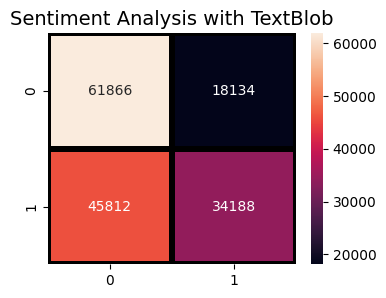

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(test_sentiments, predicted_sentiments),
                annot=True,fmt = "d",linecolor="k",linewidths=3)

plt.title("Sentiment Analysis with TextBlob",fontsize=14)
plt.show()

Accuracy Score

In [ ]:
from sklearn.metrics import accuracy_score
TextBlob_model = accuracy_score(test_sentiments, predicted_sentiments)
print(TextBlob_model)

0.6003375


# Sentiment Analysis with AFINN

The AFINN lexicon is perhaps one of the simplest and most popular lexicons and can be used extensively for sentiment analysis.Developed and curated by Finn Årup Nielsen.It contains 3300+ words with a polarity score associated with each word. Words scores range from minus five (negative) to plus five (positive). You can find this lexicon at the author’s official GitHub repository along with previous versions of this lexicon including AFINN-111 at https://github.com/fnielsen/afinn/blob/master/afinn/data/.

In [ ]:
!pip install afinn
from afinn import Afinn

afn = Afinn(emoticons=True)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for afinn: filename=afinn-0.1-py3-none-any.whl size=53430 sha256=89c3f4d0f13c332f09425b59eeb31bc51872ef2058ad6886e443c00114e7c1c8
  Stored in directory: /root/.cache/pip/wheels/b0/05/90/43f79196199a138fb486902fceca30a2d1b5228e6d2db8eb90
Successfully built afinn


In [ ]:
afinn_wl_url = ('https://raw.githubusercontent.com'
                '/fnielsen/afinn/master/afinn/data/AFINN-111.txt')

afinn_wl_df = pd.read_csv(afinn_wl_url,
                          header=None, # no column names
                          sep='\t',  # tab sepeated
                          names=['term', 'value']) #new column names

seed = 808 # seed for sample so results are stable
afinn_wl_df.sample(10, random_state = seed)

,term,value
1852,regret,-2
1285,indifferent,-2
681,disappoints,-2
770,doubts,-1
1644,outmaneuvered,-2
55,admit,-1
1133,haha,3
1160,haunt,-1
2435,wishing,1
21,abused,-3


In [ ]:
for i in sample_comment_ids:
    comment = test_comments[i]
    sentiment = test_sentiments[i]
    print('COMMENT:', comment)
    print('Actual Sentiment:', sentiment)
    print('Predicted Sentiment polarity:', afn.score(comment))
    print('-'*60)

COMMENT: mocashop wow normal ferrel fan make sad wait dvd not wast thx head
Actual Sentiment: negative
Predicted Sentiment polarity: 5.0
------------------------------------------------------------
COMMENT: would someon care explain konran wallenrod wikipedia suck
Actual Sentiment: negative
Predicted Sentiment polarity: -1.0
------------------------------------------------------------
COMMENT: bed tag do night tomorrow work entir websit hope look well not like
Actual Sentiment: negative
Predicted Sentiment polarity: 4.0
------------------------------------------------------------
COMMENT: dy say everi sunset thr sunris delhi day extrem heat temp reach thr rain
Actual Sentiment: positive
Predicted Sentiment polarity: 1.0
------------------------------------------------------------
COMMENT: get do die hairrrr home chillin wit si
Actual Sentiment: positive
Predicted Sentiment polarity: -3.0
------------------------------------------------------------
COMMENT: lose billa soon icon go to ph

declared the sentiments as positive and negative &
Predicted the sentiment for test dataset

In [ ]:
sentiment_polarity = [afn.score(comment) for comment in test_comments]
predicted_sentiments = ['positive' if score >= 1.0 else 'negative' for score in sentiment_polarity]

Sample review IDs report

In [ ]:
afn_sentiment_polarity = sentiment_polarity[2],sentiment_polarity[555],sentiment_polarity[17626], sentiment_polarity[153533], sentiment_polarity[120043], sentiment_polarity[79859], sentiment_polarity[119010], sentiment_polarity[159997]
afn_predicted_sentiments = predicted_sentiments[2],predicted_sentiments[555],predicted_sentiments[17626], predicted_sentiments[153533], predicted_sentiments[120043], predicted_sentiments[79859], predicted_sentiments[119010], predicted_sentiments[159997]

In [ ]:
afn_sample_report = {'Text':Text,'Real_sentiments':Real_sentiments,'afn_sentiment_polarity':afn_sentiment_polarity,
                          'afn_predicted_sentiments':afn_predicted_sentiments}
afn_sample_report = pd.DataFrame(data=afn_sample_report)

In [ ]:
afn_sample_report.style.applymap(color_negative_red, subset=['Real_sentiments','afn_predicted_sentiments'])

,Text,Real_sentiments,afn_sentiment_polarity,afn_predicted_sentiments
0,mocashop wow normal ferrel fan make sad wait dvd not wast thx head,negative,5.000000,positive
1,would someon care explain konran wallenrod wikipedia suck,negative,-1.000000,negative
2,bed tag do night tomorrow work entir websit hope look well not like,negative,4.000000,positive
3,dy say everi sunset thr sunris delhi day extrem heat temp reach thr rain,positive,1.000000,positive
4,get do die hairrrr home chillin wit si,positive,-3.000000,negative
5,lose billa soon icon go to photoshop minto daviestramp onto,negative,0.000000,negative
6,kburi I m total broke can not much socialis payday otherwis would defo come along drink soon x,positive,-1.000000,negative
7,morn world take parent meal today ahem forget rubi anniversari last week blame lisa,positive,-3.000000,negative


classification report and confusion matrix

In [ ]:
labels = ['negative', 'positive']
print(classification_report(test_sentiments, predicted_sentiments))
pd.DataFrame(confusion_matrix(test_sentiments, predicted_sentiments), index=labels, columns=labels)

              precision    recall  f1-score   support

    negative       0.59      0.72      0.65     80000
    positive       0.64      0.50      0.56     80000

    accuracy                           0.61    160000
   macro avg       0.62      0.61      0.61    160000
weighted avg       0.62      0.61      0.61    160000



,negative,positive
negative,57980,22020
positive,40158,39842


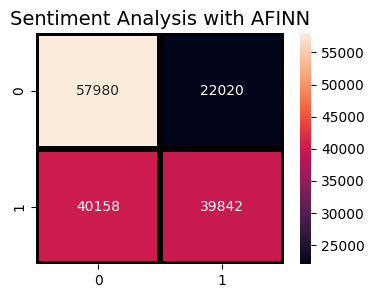

In [ ]:
warnings.filterwarnings('ignore')

plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(test_sentiments, predicted_sentiments),
                annot=True,fmt = "d",linecolor="k",linewidths=3)

plt.title("Sentiment Analysis with AFINN",fontsize=14)
plt.show()

Accuracy Score

In [ ]:
from sklearn.metrics import accuracy_score
AFINN_model = accuracy_score(test_sentiments, predicted_sentiments)
print(AFINN_model)

0.6113875


# Sentiment Analysis with SentiWordNet

SentiWordNet is a lexical resource for opinion mining.SentiWordNet operates on the database provided by WordNet.The additional functionality that it provides is the measure of positivity, negativity or neutrality as is required for Sentiment Analysis.

* Thus, every synset s is associated with a Pos(s): a positivity score Neg(s): a negativity score Obj(s): an objectivity (neutrality) score

  Pos(s) + Neg(s) + Obj(s) = 1

* The scores are very precise, pertaining to the word itself alongwith its context. All three scores range within the values [0,1]. The current version of SentiWordNet is 3.0, which is based on WordNet 3.0

In [ ]:
from nltk.corpus import sentiwordnet as swn

awesome = list(swn.senti_synsets('awesome', 'a'))[0]
print('Positive Polarity Score:', awesome.pos_score())
print('Negative Polarity Score:', awesome.neg_score())
print('Objective Score:', awesome.obj_score())

Positive Polarity Score: 0.875
Negative Polarity Score: 0.125
Objective Score: 0.0


An Example

In [ ]:
list(swn.senti_synsets('slow'))

[SentiSynset('decelerate.v.01'),
 SentiSynset('slow.v.02'),
 SentiSynset('slow.v.03'),
 SentiSynset('slow.a.01'),
 SentiSynset('slow.a.02'),
 SentiSynset('dense.s.04'),
 SentiSynset('slow.a.04'),
 SentiSynset('boring.s.01'),
 SentiSynset('dull.s.08'),
 SentiSynset('slowly.r.01'),
 SentiSynset('behind.r.03')]

In [ ]:
def analyze_sentiment_sentiwordnet_lexicon(comment,
                                           verbose=False):

    # tokenize and POS tag text tokens
    tagged_text = [(token.text, token.tag_) for token in nlp(comment)]
    pos_score = neg_score = token_count = obj_score = 0
    # get wordnet synsets based on POS tags
    # get sentiment scores if synsets are found
    for word, tag in tagged_text:
        ss_set = None
        if 'NN' in tag and list(swn.senti_synsets(word, 'n')):
            ss_set = list(swn.senti_synsets(word, 'n'))[0]
        elif 'VB' in tag and list(swn.senti_synsets(word, 'v')):
            ss_set = list(swn.senti_synsets(word, 'v'))[0]
        elif 'JJ' in tag and list(swn.senti_synsets(word, 'a')):
            ss_set = list(swn.senti_synsets(word, 'a'))[0]
        elif 'RB' in tag and list(swn.senti_synsets(word, 'r')):
            ss_set = list(swn.senti_synsets(word, 'r'))[0]
        # if senti-synset is found
        if ss_set:
            # add scores for all found synsets
            pos_score += ss_set.pos_score()
            neg_score += ss_set.neg_score()
            obj_score += ss_set.obj_score()
            token_count += 1

    # aggregate final scores
    final_score = pos_score - neg_score
    #norm_final_score = round(float(final_score) / token_count, 2)
    if token_count != 0:
        norm_final_score = round(float(final_score) / token_count, 2)
    else:
        norm_final_score = 0.0
    final_sentiment = 'positive' if norm_final_score >= 0 else 'negative'
    if verbose:
        norm_obj_score = round(float(obj_score) / token_count, 2)
        norm_pos_score = round(float(pos_score) / token_count, 2)
        norm_neg_score = round(float(neg_score) / token_count, 2)
        # to display results in a nice table
        sentiment_frame = pd.DataFrame([[final_sentiment, norm_obj_score, norm_pos_score,
                                         norm_neg_score, norm_final_score]],
                                       columns=pd.MultiIndex(levels=[['SENTIMENT STATS:'],
                                                             ['Predicted Sentiment', 'Objectivity',
                                                              'Positive', 'Negative', 'Overall']],
                                                             labels=[[0,0,0,0,0],[0,1,2,3,4]]))
        print(sentiment_frame)

    return final_sentiment

In [ ]:
test_comments_d = pd.DataFrame(test_comments_df)
null_values = test_comments_d.isnull().sum()
print(null_values)

0    0
dtype: int64


In [ ]:
predicted_sentiments = [analyze_sentiment_sentiwordnet_lexicon(comment, verbose=False) for comment in test_comments_df]

In [ ]:
snet_predicted_sentiments = predicted_sentiments[2],predicted_sentiments[555],predicted_sentiments[17626], predicted_sentiments[153533], predicted_sentiments[120043], predicted_sentiments[79859], predicted_sentiments[119010], predicted_sentiments[159997]

In [ ]:
sentiwordnet_sample_report = {'Text':Text,'Real_sentiments':Real_sentiments,
                          'snet_predicted_sentiments':snet_predicted_sentiments}
sentiwordnet_sample_report = pd.DataFrame(data=sentiwordnet_sample_report)

In [ ]:
sentiwordnet_sample_report

,Text,Real_sentiments,snet_predicted_sentiments
0,mocashop wow normal ferrel fan make sad wait d...,negative,negative
1,would someon care explain konran wallenrod wik...,negative,positive
2,bed tag do night tomorrow work entir websit ho...,negative,negative
3,dy say everi sunset thr sunris delhi day extre...,positive,positive
4,get do die hairrrr home chillin wit si,positive,positive
5,lose billa soon icon go to photoshop minto dav...,negative,negative
6,kburi I m total broke can not much socialis pa...,positive,negative
7,morn world take parent meal today ahem forget ...,positive,negative


In [ ]:
sentiwordnet_sample_report.style.applymap(color_negative_red, subset=['Real_sentiments','snet_predicted_sentiments'])

,Text,Real_sentiments,snet_predicted_sentiments
0,mocashop wow normal ferrel fan make sad wait dvd not wast thx head,negative,negative
1,would someon care explain konran wallenrod wikipedia suck,negative,positive
2,bed tag do night tomorrow work entir websit hope look well not like,negative,negative
3,dy say everi sunset thr sunris delhi day extrem heat temp reach thr rain,positive,positive
4,get do die hairrrr home chillin wit si,positive,positive
5,lose billa soon icon go to photoshop minto daviestramp onto,negative,negative
6,kburi I m total broke can not much socialis payday otherwis would defo come along drink soon x,positive,negative
7,morn world take parent meal today ahem forget rubi anniversari last week blame lisa,positive,negative


In [ ]:
labels = ['negative', 'positive']
print(classification_report(test_sentiments, predicted_sentiments))
pd.DataFrame(confusion_matrix(test_sentiments, predicted_sentiments), index=labels, columns=labels)

              precision    recall  f1-score   support

    negative       0.68      0.51      0.58     80000
    positive       0.61      0.75      0.67     80000

    accuracy                           0.63    160000
   macro avg       0.64      0.63      0.63    160000
weighted avg       0.64      0.63      0.63    160000



,negative,positive
negative,40940,39060
positive,19668,60332


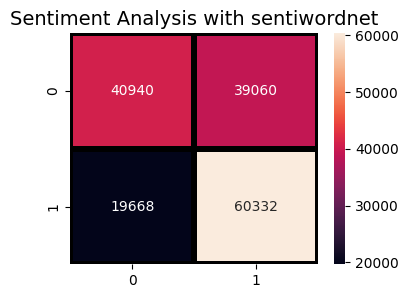

In [ ]:
warnings.filterwarnings('ignore')

plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(test_sentiments, predicted_sentiments),
                annot=True,fmt = "d",linecolor="k",linewidths=3)

plt.title("Sentiment Analysis with sentiwordnet",fontsize=14)
plt.show()

Accuracy Score

In [ ]:
sentiwordnet_model = accuracy_score(test_sentiments, predicted_sentiments)
print(sentiwordnet_model)

0.63295


# Sentiment Analysis with VADER

The VADER lexicon, developed by C.J. Hutto, is based on a rule-based sentiment analysis framework, specifically tuned to analyze sentiments in social media. VADER stands for Valence Aware Dictionary and sEntiment Reasoner. Details about this framework can be read in the original paper by Hutto, C.J., and Gilbert, E.E. (2014), entitled “VADER: A Parsimonious Rule-based Model for Sentiment Analysis of Social Media Text,” from the proceedings of the Eighth International Conference on Weblogs and Social Media (ICWSM-14). You can use the library based on NLTK’s interface under the nltk. sentiment.vader module. There were a total of over 9,000 lexical features from which over 7,500 curated lexical features were finally selected in the lexicon with proper validated valence scores.

Each feature was rated on a scale from "[-4] Extremely Negative" to "[4] Extremely Positive", with allowance for "[0] Neutral (or Neither, N/A)".

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

def analyze_sentiment_vader_lexicon(review,
                                    threshold=0.1,
                                    verbose=False):
    # analyze the sentiment for review
    analyzer = SentimentIntensityAnalyzer()
    scores = analyzer.polarity_scores(review)
    # get aggregate scores and final sentiment
    agg_score = scores['compound']
    final_sentiment = 'positive' if agg_score >= threshold\
                                   else 'negative'
    if verbose:
        # display detailed sentiment statistics
        positive = str(round(scores['pos'], 2)*100)+'%'
        final = round(agg_score, 2)
        negative = str(round(scores['neg'], 2)*100)+'%'
        neutral = str(round(scores['neu'], 2)*100)+'%'
        sentiment_frame = pd.DataFrame([[final_sentiment, final, positive,
                                        negative, neutral]],
                                        columns=pd.MultiIndex(levels=[['SENTIMENT STATS:'],
                                                                      ['Predicted Sentiment', 'Polarity Score',
                                                                       'Positive', 'Negative', 'Neutral']],
                                                              codes=[[0,0,0,0,0],[0,1,2,3,4]]))
        print(sentiment_frame)

    return final_sentiment

In [ ]:
for i in sample_comment_ids:
    comment = test_comments[i]
    sentiment = test_sentiments[i]
    print('COMMENT:', comment)
    print('Actual Sentiment:', sentiment)
    pred = analyze_sentiment_vader_lexicon(comment, threshold=0.4, verbose=True)
    print('-'*60)

COMMENT: mocashop wow normal ferrel fan make sad wait dvd not wast thx head
Actual Sentiment: negative
     SENTIMENT STATS:                                         
  Predicted Sentiment Polarity Score Positive Negative Neutral
0            negative           0.22    30.0%    26.0%   44.0%
------------------------------------------------------------
COMMENT: would someon care explain konran wallenrod wikipedia suck
Actual Sentiment: negative
     SENTIMENT STATS:                                         
  Predicted Sentiment Polarity Score Positive Negative Neutral
0            negative           0.08    26.0%    24.0%   50.0%
------------------------------------------------------------
COMMENT: bed tag do night tomorrow work entir websit hope look well not like
Actual Sentiment: negative
     SENTIMENT STATS:                                               \
  Predicted Sentiment Polarity Score             Positive Negative   
0            positive           0.44  28.999999999999996%  

In [ ]:
predicted_sentiments = [analyze_sentiment_vader_lexicon(comment, threshold=0.4, verbose=False) for comment in test_comments]

In [ ]:
labels = ['negative', 'positive']
print(classification_report(test_sentiments, predicted_sentiments))
pd.DataFrame(confusion_matrix(test_sentiments, predicted_sentiments), index=labels, columns=labels)

              precision    recall  f1-score   support

    negative       0.58      0.82      0.68     80000
    positive       0.70      0.40      0.51     80000

    accuracy                           0.61    160000
   macro avg       0.64      0.61      0.60    160000
weighted avg       0.64      0.61      0.60    160000



,negative,positive
negative,65988,14012
positive,47860,32140


In [ ]:
vader_predicted_sentiments = predicted_sentiments[2],predicted_sentiments[555],predicted_sentiments[17626], predicted_sentiments[153533], predicted_sentiments[120043], predicted_sentiments[79859], predicted_sentiments[119010], predicted_sentiments[159997]

In [ ]:
print(len(Text), len(Real_sentiments), len(vader_predicted_sentiments))

8 8 8


In [ ]:
vader_sample_report = pd.DataFrame({
    'Text': Text,
    'Real_sentiments': Real_sentiments,
    'vader_predicted_sentiments': vader_predicted_sentiments
})

In [ ]:
vader_sample_report.style.applymap(color_negative_red, subset=['Real_sentiments','vader_predicted_sentiments'])

,Text,Real_sentiments,vader_predicted_sentiments
0,mocashop wow normal ferrel fan make sad wait dvd not wast thx head,negative,negative
1,would someon care explain konran wallenrod wikipedia suck,negative,negative
2,bed tag do night tomorrow work entir websit hope look well not like,negative,positive
3,dy say everi sunset thr sunris delhi day extrem heat temp reach thr rain,positive,negative
4,get do die hairrrr home chillin wit si,positive,negative
5,lose billa soon icon go to photoshop minto daviestramp onto,negative,negative
6,kburi I m total broke can not much socialis payday otherwis would defo come along drink soon x,positive,negative
7,morn world take parent meal today ahem forget rubi anniversari last week blame lisa,positive,negative


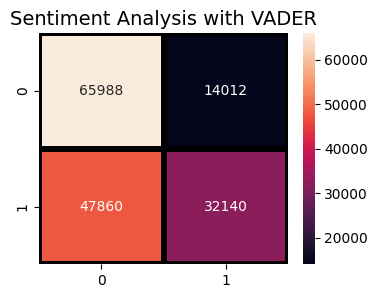

In [ ]:
warnings.filterwarnings('ignore')

plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(test_sentiments, predicted_sentiments),
                annot=True,fmt = "d",linecolor="k",linewidths=3)

plt.title("Sentiment Analysis with VADER",fontsize=14)
plt.show()

In [ ]:
VADER_model = accuracy_score(test_sentiments, predicted_sentiments)
print(VADER_model)

0.6133


# Sentiment Analysis with Flair


Till now we have used Rule Based models
Flair is an embedding based model

Flair is a state-of-art NLP framework built on PyTorch. It incorporates recent researches and provides an easy way to combine different embeddings to various NLP tasks. The pre-trained sentiment model offers a tool for sentiment analysis without training a customized model.

Unlike TextBlob and VADER that output a sentiment score between -1 and 1, flair sentiment output the predicted label with a confidence score. The confidence score ranges from 0 to 1, with 1 being very confident and 0 being very unconfident.

Before predicting the sentiment of a text, the input text needs to be tokenized by Sentence(). After that, we can see the sample text was split into nine tokens.

In [ ]:
!curl https://nlp.informatik.hu-berlin.de/resources/models/sentiment-curated-distilbert/sentiment-en-mix-distillbert_4.pt

In [ ]:
from flair.models import TextClassifier


# Import flair Sentence to process input text
from flair.data import Sentence

ModuleNotFoundError: No module named 'flair'

In [ ]:
!ls flair/models/

In [ ]:
classifier = TextClassifier.load('resources/taggers/question-classification-with-transformer/final-model.pt')

In [ ]:
model_path = 'flair/models/text_classification_model.pt'
classifier = TextClassifier.load(model_path)

In [ ]:
# Define a function to get Flair sentiment prediction score
def score_flair(text):
  sentence = Sentence(text)
  classifier.predict(sentence)
  score = sentence.labels[0].score
  value = sentence.labels[0].value
  return score, value

In [ ]:
import plotly.graph_objects as go

x = ['TextBlob', 'AFINN', 'SentiWordNet','VADER']
y = [TextBlob_model, AFINN_model, sentiwordnet_model, VADER_model]

# Use the hovertext kw argument for hover text
fig = go.Figure(data=[go.Bar(x=x, y=y,)])
# Customize aspect
fig.update_layout(title_text='Sentiment Analysis - Unsupervised Lexical')
fig.show()

# Using Max() rule to get the final sentiment scores of four models


and if any row is

In [ ]:
from collections import Counter

# Define functions to calculate sentiment scores using each method

def get_textblob_sentiment(text):
    return 'positive' if textblob.TextBlob(text).sentiment.polarity >= 0.1 else 'negative'

def get_afinn_sentiment(text):
    return 'positive' if afn.score(text) >= 1.0 else 'negative'

def get_sentiwordnet_sentiment(text):
    sentiment = analyze_sentiment_sentiwordnet_lexicon(text, verbose=False)
    return sentiment

def get_vader_sentiment(text):
    sentiment = analyze_sentiment_vader_lexicon(text, threshold=0.4, verbose=False)
    return sentiment

# Calculate sentiment scores for each row using all methods
all_sentiments = []
for text in test_comments_df:
    textblob_sentiment = get_textblob_sentiment(text)
    afinn_sentiment = get_afinn_sentiment(text)
    sentiwordnet_sentiment = get_sentiwordnet_sentiment(text)
    vader_sentiment = get_vader_sentiment(text)

    all_sentiments.append((textblob_sentiment, afinn_sentiment, sentiwordnet_sentiment, vader_sentiment))

# Determine final sentiment for each row
final_sentiments = []
for sentiments in all_sentiments:
    sentiment_counts = Counter(sentiments)
    if sentiment_counts['positive'] == sentiment_counts['negative']:  # If equal positive and negative sentiments
        # Prioritize SentiWordNet sentiment
        final_sentiment = get_sentiwordnet_sentiment(text)  # Calculate SentiWordNet sentiment for the current row
    else:
        final_sentiment = max(sentiment_counts, key=sentiment_counts.get)  # Choose the sentiment with maximum count
    final_sentiments.append(final_sentiment)

# Calculate accuracy
#correct_predictions = sum(final_sentiments[i] == ground_truth_sentiments[i] for i in range(len(final_sentiments)))
#accuracy = correct_predictions / len(final_sentiments)
#print("Accuracy:", accuracy)


In [ ]:
labels = ['negative', 'positive']
print(classification_report(test_sentiments, final_sentiments))
pd.DataFrame(confusion_matrix(test_sentiments, final_sentiments), index=labels, columns=labels)

In [ ]:
all_final_sentiments = final_sentiments[2], final_sentiments[555], final_sentiments[17626], final_sentiments[153533], final_sentiments[120043], final_sentiments[79859], final_sentiments[119010], final_sentiments[159997]

In [ ]:
all_sample_report = pd.DataFrame({
    'Text': Text,
    'Real_sentiments': Real_sentiments,
    'all_final_sentiments': all_final_sentiments
})

In [ ]:
all_sample_report.style.applymap(color_negative_red, subset=['Real_sentiments','all_final_sentiments'])

In [ ]:
warnings.filterwarnings('ignore')

plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(test_sentiments, final_sentiments),
                annot=True,fmt = "d",linecolor="k",linewidths=3)

plt.title("Sentiment Analysis with all of them",fontsize=14)
plt.show()

In [ ]:
ALL_model = accuracy_score(test_sentiments, final_sentiments)
print(ALL_model)

In [ ]:
import plotly.graph_objects as go

x = ['TextBlob', 'AFINN', 'SentiWordNet', 'VADER', 'ALLinOne']
y = [TextBlob_model, AFINN_model, sentiwordnet_model, VADER_model, ALL_model]

# Use the hovertext kw argument for hover text
fig = go.Figure(data=[go.Bar(x=x, y=y,)])
# Customize aspect
fig.update_layout(title_text='Sentiment Analysis - Unsupervised Lexical')
fig.show()

# Negation Extraction

In [ ]:
import pandas as pd
import numpy as np
import ast

import warnings
warnings.filterwarnings('ignore')

import nltk
import re
import sys
import os
from itertools import dropwhile
#import postagger
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
import spacy
from spacy import displacy

In [ ]:
nlp1 = spacy.load('en')

In [ ]:
def parse_dependency_new(x):

    def existence_checking(p):
        try:
            temp[p]
            y = True
        except:
            y = False
        return y

    def check(p1,p2):
        try:
            graph[p2][p1]
            y = True
        except:
            y = False
        return y

    doc = nlp(x)
    temp = {}
    for token in doc:
        if not existence_checking(token.text):
            temp[token.idx] = token.head.idx
        else:
            temp[token.idx] = token.head.idx

    root_dic = {}
    for token in doc:
        if token.dep_ == 'ROOT':
            root_dic[token.idx] = {}

    reverse_dic = {}
    keys = list(set([k for k,v in temp.items()]))
    values = list(set([v for k,v in temp.items()]))

    graph = {}
    for k in values:
        temp_ = {}
        for v in keys:
            if v != k:
                if temp[v] == k:
                    temp_[v] = {}
        graph[k] = temp_

    for k,v in graph.items():
        for k1, v1 in graph.items():
            if check(k,k1):
                graph[k1][k] = graph[k]

    graph_ = {}
    for k in root_dic.keys():
        graph_[k] = graph[k]

    return graph_

In [ ]:
def findKeys(data, key,result):
    if key in list(data.keys()):
        #print(key,"====",data)
        result.append(data[key])
    else:
        for i in list(data.keys()):
            if type(data[i]) == dict:
                #print(i,data[i])
                findKeys(data[i],key,result)
    return result

In [ ]:
def findKeys_K(data,key_,word_id_dic):
    key_id_lis = []
    for k,v in word_id_dic.items():
        if v == key_:
            key_id_lis.append(k)
    result_all = []
    for key in key_id_lis:
        result = []
        result_all.append(findKeys(data,key,result))
    return result_all

In [ ]:
def negation_existence(x, key_w):
    x = x.lower()
    x = x.replace('~','')
    x = x.replace('$','')
    doc = nlp(x)

    word_id_dic = {}
    for token in doc:
        word_id_dic[token.idx] = token.text

    output_lis = []

    for token in doc:
        if token.text in ['no','not',"n't","wouldn't",'never','nobody','nothing','neither','nowhere','noone',
                         'no-one','hardly','scarcely','barely']:
            try:
                if token.dep_ == 'det':
                    if token.head.text == key_w:
                        y = 1
                    else:
                        y = 0
                else:
                    try:
                        if token.dep_ == 'neg' or token.head.pos_ == 'VERB':

                            g = parse_dependency_new(x)
                            g1 = findKeys_K(g,token.head.text,word_id_dic)

                            if len(g1) != 0:
                                len_lis = []
                                for j in range(len(g1)):
                                    g2 = findKeys_K(g1[j][0],key_w, word_id_dic)
                                    len_lis.append(len(g2[0]))

                                if any(len_lis) !=0:
                                    y = 1
                                else:
                                    y = 0
                            else:
                                y = 0
                        else:
                            y = 0
                    except:
                        pass
                output_lis.append(y)
            except:
                pass
        else:
            pass
    if any(output_lis) == 1:
        out = 1
    else:
        out = 0
    return out

In [ ]:
negation_existence("I like tea, but I don't drink coffee",'tea')

In [ ]:
negation_existence("I like tea, but I don't drink coffee",'coffee')

In [ ]:
doc = nlp("I like tea, but I don't drink coffee")

In [ ]:
displacy.render(doc,style='dep',jupyter=True)

In [ ]:
import textblob
import spacy_stanza
from negspacy.negation import Negex
from negspacy.termsets import termset
from afinn import Afinn
from nltk.corpus import sentiwordnet as swn
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Load SpaCy pipeline with Stanza
nlp_model = spacy_stanza.load_pipeline('en')

# Add negation detection component
negex = Negex(nlp_model, ent_types=["PERSON", "ORG", "CARDINAL", "DATE", "EVENT", "LANGUAGE", "PRODUCT", "QUANTITY", "TIME", "WORK_OF_ART"])
nlp_model.add_pipe(negex)

# Define functions to detect negation and adjust sentiment score

def detect_negation(text):
    negation_words = {'not', 'no', 'never', 'none', 'nobody', 'nothing', 'nowhere', 'neither', 'nor'}
    doc = nlp_model(text)
    negation_detected = any(token.text.lower() in negation_words for token in doc)
    return negation_detected

def adjust_sentiment_with_negation(score, text):
    if detect_negation(text):
        return -score
    return score

# Sentiment analysis using TextBlob with negation detection
def get_textblob_sentiment_with_negation(text):
    sentiment_score = textblob.TextBlob(text).sentiment.polarity
    adjusted_score = adjust_sentiment_with_negation(sentiment_score, text)
    return 'positive' if adjusted_score >= 0.1 else 'negative'

# Sentiment analysis using AFINN with negation detection
afinn = Afinn()
def get_afinn_sentiment_with_negation(text):
    sentiment_score = afinn.score(text)
    adjusted_score = adjust_sentiment_with_negation(sentiment_score, text)
    return 'positive' if adjusted_score >= 1.0 else 'negative'

# Sentiment analysis using SentiWordNet with negation detection
def get_sentiwordnet_sentiment_with_negation(text):
    sentiment_score = 0.0
    tokens = nlp_model(text)
    for token in tokens:
        synsets = list(swn.senti_synsets(token.text))
        if synsets:
            synset = synsets[0]
            sentiment_score += synset.pos_score() - synset.neg_score()
    adjusted_score = adjust_sentiment_with_negation(sentiment_score, text)
    return 'positive' if adjusted_score >= 0.1 else 'negative'

# Sentiment analysis using VADER with negation detection
vader_analyzer = SentimentIntensityAnalyzer()
def get_vader_sentiment_with_negation(text):
    sentiment_score = vader_analyzer.polarity_scores(text)['compound']
    adjusted_score = adjust_sentiment_with_negation(sentiment_score, text)
    return 'positive' if adjusted_score >= 0.1 else 'negative'

# Test with sample text
sample_text = 'He does not like Adolf Hitler but likes German products.'

print("TextBlob with negation detection:", get_textblob_sentiment_with_negation(sample_text))
print("AFINN with negation detection:", get_afinn_sentiment_with_negation(sample_text))
print("SentiWordNet with negation detection:", get_sentiwordnet_sentiment_with_negation(sample_text))
print("VADER with negation detection:", get_vader_sentiment_with_negation(sample_text))


In [ ]:
import spacy
import stanza
import spacy_stanza
from negspacy.negation import Negex
from negspacy.termsets import termset
import textblob
import afn
import nltk
from nltk.corpus import sentiwordnet as swn
from nltk.corpus import wordnet as wn
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer as VADER_SentimentIntensityAnalyzer

# Load SpaCy with Stanza
nlp_model = spacy_stanza.load_pipeline('en')

# Add negation detection component
negex = Negex(nlp_model, ent_types=["PERSON", "ORG", "CARDINAL", "DATE", "EVENT", "LANGUAGE", "PRODUCT", "QUANTITY", "TIME", "WORK_OF_ART"])
nlp_model.add_pipe(negex)

# Initialize sentiment analyzers
sid = SentimentIntensityAnalyzer()
vader_analyzer = VADER_SentimentIntensityAnalyzer()

# Define function to detect negations
def detect_negations(text):
    negation_words = set(termset['Negation'])
    negations = []
    tokens = word_tokenize(text)
    for i, token in enumerate(tokens):
        if token.lower() in negation_words:
            negations.append((i, token))
    return negations

# TextBlob with negation detection
def get_textblob_sentiment(text):
    negations = detect_negations(text)
    blob = textblob.TextBlob(text)
    polarity = blob.sentiment.polarity
    if negations:
        polarity *= -1  # Reverse polarity if negation is detected
    return 'positive' if polarity >= 0.1 else 'negative'

# AFINN with negation detection
def get_afinn_sentiment(text):
    negations = detect_negations(text)
    score = afn.score(text)
    if negations:
        score *= -1  # Reverse score if negation is detected
    return 'positive' if score >= 1.0 else 'negative'

# SentiWordNet
def get_sentiwordnet_sentiment(text):
    sentiment_score = 0.0
    tokens = word_tokenize(text)
    for token in tokens:
        synsets = wn.synsets(token)
        if synsets:
            synset = synsets[0]  # Consider only the first synset
            senti_synset = swn.senti_synset(synset.name())
            sentiment_score += senti_synset.pos_score() - senti_synset.neg_score()
    return 'positive' if sentiment_score >= 0.0 else 'negative'

# VADER with negation detection
def get_vader_sentiment(text):
    negations = detect_negations(text)
    scores = vader_analyzer.polarity_scores(text)
    compound_score = scores['compound']
    if negations:
        compound_score *= -1  # Reverse score if negation is detected
    return 'positive' if compound_score >= 0.0 else 'negative'

# Test sentences
sentences = [
    'There is no English language option.',
    'He does not like Adolf Hitler but likes German products.'
]

# Perform sentiment analysis with each method
for text in sentences:
    print("Text:", text)
    print("TextBlob Sentiment:", get_textblob_sentiment(text))
    print("AFINN Sentiment:", get_afinn_sentiment(text))
    print("SentiWordNet Sentiment:", get_sentiwordnet_sentiment(text))
    print("VADER Sentiment:", get_vader_sentiment(text))
    print()


In [ ]:
import tkinter as tk
from tkinter import messagebox

